Проект

Вы — аналитик данных, и сейчас идёте в стартап, который создает новый маркетплейс. Он недавно появился на рынке и занимается продажей новых товаров из Бразилии, которые только начинают поступать в продажу.

Продакт-менеджер Петя переживает за свой продукт, так как выручка маркетплейса стоит на месте уже несколько месяцев. Он предложил вам полную свободу действий. Главное — чтобы метрики росли, а мы не причиняли неудобства клиентам, ведь Петя заботится об их опыте.

Задачи
Вы поразмышляли и сформулировали список задач:

Задача 1: Оценить месячный retention в оформление заказа с помощью когортного анализа.

Задача 2: Определить, существует ли product/market fit у этого маркетплейса.

Задача 3: Определить 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.

Задача 4: Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

Задача 5: Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.

Задача 6: Сформулировать выводы о проделанной работе.

Импорт библиотек

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from operator import attrgetter
from matplotlib import colors as mcolors

Загрузка данных

In [36]:
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')

In [37]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [38]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [39]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [40]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [41]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [42]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Объединение данных

In [43]:
df_1 = df_customers.merge(df_orders, on = 'customer_id', how = 'inner')
df = df_1.merge(df_items, on = 'order_id', how = 'inner')

In [44]:
# Выбираю нужные столбцы в новую таблицу
df_chrt = df.query('order_status == "delivered"')[['customer_unique_id', 'order_purchase_timestamp']].copy()

In [45]:
# Преобразую столбец в формат даты
df_chrt['order_purchase_timestamp'] = pd.to_datetime(df_chrt['order_purchase_timestamp'])

In [46]:
# Извлекаем месяц и день заказа   
df_chrt['order_period'] = df_chrt['order_purchase_timestamp'].dt.to_period('M')
df_chrt['order_period_day'] = df_chrt['order_purchase_timestamp'].dt.to_period('D')

In [47]:
# Присваиваем когорты на основе даты первого действия для каждого пользователя
df_chrt['cohort'] = df_chrt.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
df_chrt['cohort_day'] = df_chrt.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')

In [48]:
# Рассчитываем номер периода в днях (месячные периоды, деля на 30)
df_chrt['period_number_month'] = np.floor((df_chrt.order_period_day - df_chrt.cohort_day).apply(attrgetter('n')) / 30)

In [49]:
df_cohort = df_chrt.groupby(['cohort', 'period_number_month']).agg(n_customers = ('customer_unique_id', 'nunique')).reset_index()

In [50]:
# Создаем сводную таблицу для когортного анализа
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

In [51]:
# Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:, 0]

In [52]:
# Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

Задача 1. Оценить месячный retention в оформление заказа с помощью когортного анализа.

In [53]:
# Retention первого месяца
retention_month_1 = retention_matrix[1]

# Вычисляем медиану
median_retention = round(retention_month_1.median(), 4)

median_retention

0.0035

In [54]:
# Найти когорту с самым высоким retention на 3-й месяц.

# Retention третьего месяца
retention_month_3 = retention_matrix[3]

# Вычисляем max cohort
max_cohort = retention_month_3.idxmax()

max_cohort

Period('2017-01', 'M')

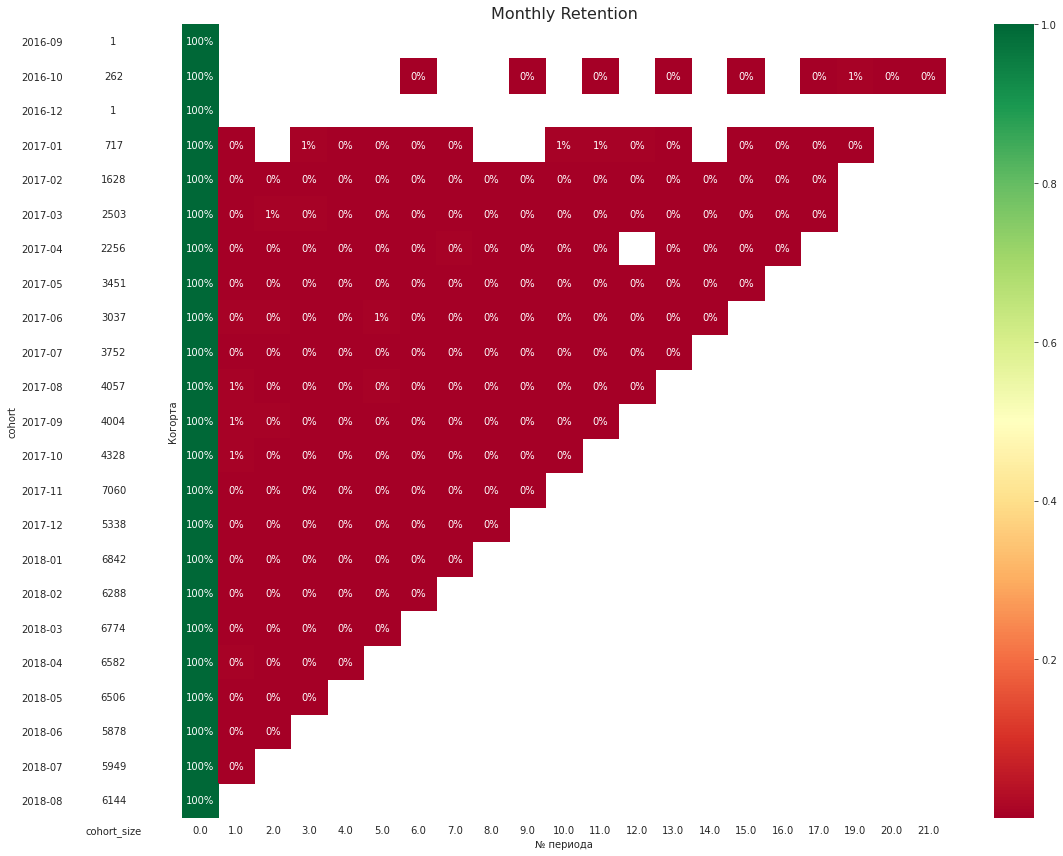

In [55]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

Задача 2. Определить, существует ли product/market fit у маркетплейса.

У маркетплейса нет PMF. Когортный анализ показывает крайне низкий retention после нулевого месяца. 
Медианный retention первого месяца равен 0.35%. 
Все это указывает на то, что продукт не соответствует рынку. 
Мы не можем масштабировать продукт, имея такой retention.

Задача 3.

In [56]:
# Первая метрика должна отражать рост объема продаж маркетплейса.
sales = df.query('order_status == "delivered"')[['order_purchase_timestamp', 'price']].copy()
sales['order_purchase_timestamp'] = pd.to_datetime(sales['order_purchase_timestamp'])
sales['order_purchase_timestamp'] = sales['order_purchase_timestamp'].dt.to_period('M')
sales_1 = sales.groupby('order_purchase_timestamp').price.sum().reset_index()
sales_1

,order_purchase_timestamp,price
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40
5,2017-03,359198.85
6,2017-04,340669.68
7,2017-05,489338.25
8,2017-06,421923.37
9,2017-07,481604.52


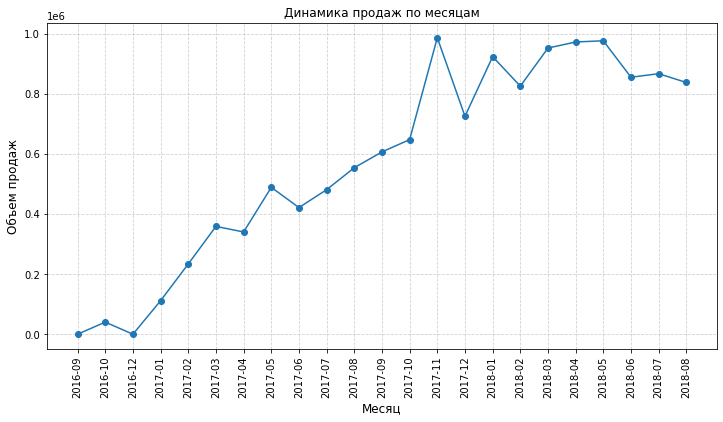

In [57]:
sales_1['order_purchase_timestamp'] = sales_1['order_purchase_timestamp'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(sales_1['order_purchase_timestamp'], sales_1['price'], marker='o')

plt.title('Динамика продаж по месяцам', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Объем продаж', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


Задача 3.

In [58]:
# Вторая — показывать объем аудитории, которой продукт доставляет ценность. MAU
active_users = df.query('order_status == "delivered"')[['order_purchase_timestamp', 'customer_unique_id']].copy()
active_users = active_users.groupby('order_purchase_timestamp').customer_unique_id.nunique().reset_index()
active_users['order_purchase_timestamp'] = pd.to_datetime(active_users['order_purchase_timestamp']).dt.to_period('M')
active_users_1 = active_users.groupby('order_purchase_timestamp').customer_unique_id.sum().reset_index()

active_users_1

,order_purchase_timestamp,customer_unique_id
0,2016-09,1
1,2016-10,265
2,2016-12,1
3,2017-01,745
4,2017-02,1650
5,2017-03,2540
6,2017-04,2296
7,2017-05,3532
8,2017-06,3126
9,2017-07,3856


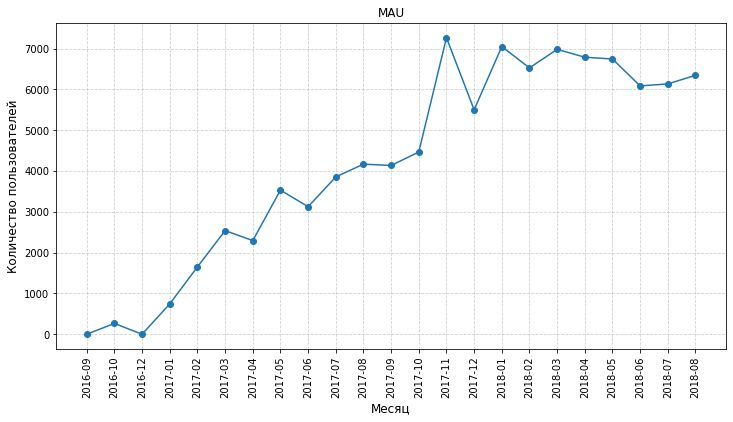

In [59]:
active_users_1['order_purchase_timestamp'] = active_users_1['order_purchase_timestamp'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(active_users_1['order_purchase_timestamp'], active_users_1['customer_unique_id'], marker='o')

plt.title('MAU', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


Задача 3.

In [60]:
# Третья — отражать заинтересованность новых клиентов в продукте. Конверсия новых пользователей в первую покупку
unique_new_customers = df['customer_unique_id'].nunique()
successful_orders = df.query('order_status == "delivered"').customer_id.unique()
converted_users = df[df['customer_id'].isin(successful_orders)]['customer_unique_id'].nunique()
conversion_rate = (converted_users / unique_new_customers) * 100

conversion_rate

97.83902745755607

Задача 3.

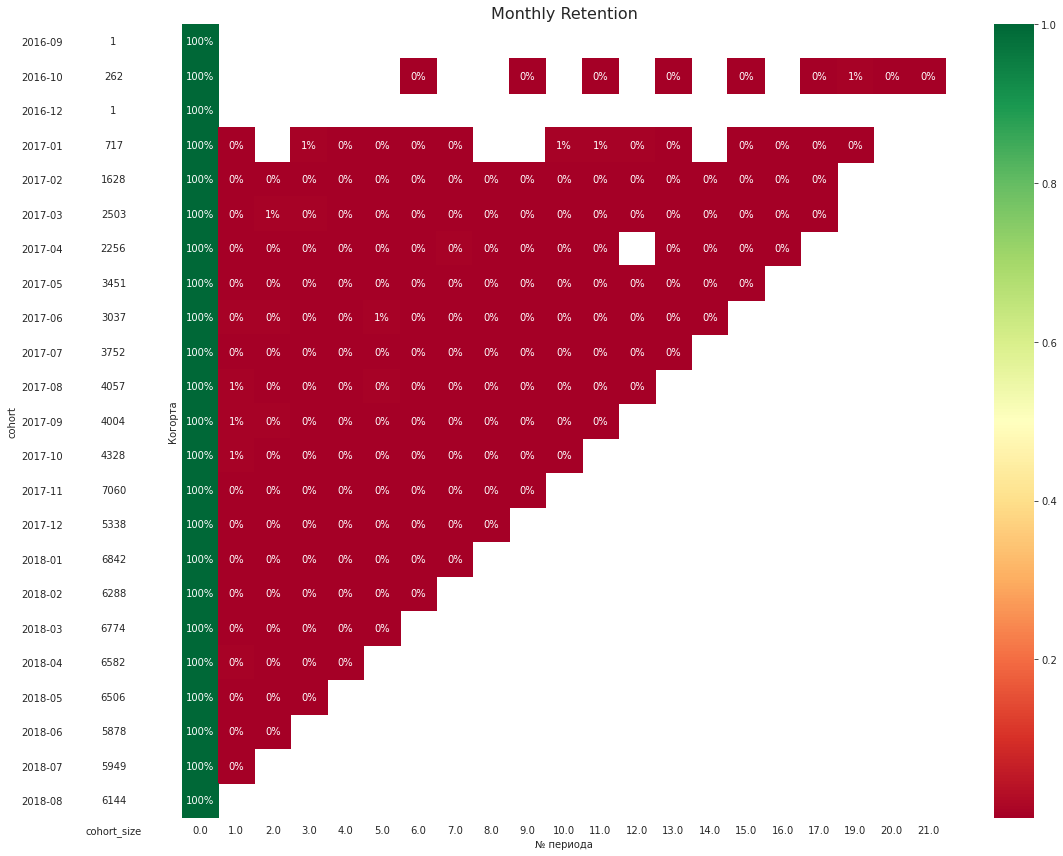

In [61]:
# Четвёртая — отражать вовлеченность клиента в продолжение использования продукта. Retention по месяцам
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

Задача 3.

In [62]:
# Пятая — отражать денежное выражение вовлеченности клиента.
mean_cheque = df.query('order_status == "delivered"')[['order_purchase_timestamp', 'price', 'customer_unique_id']].copy()
mean_cheque['order_purchase_timestamp'] = pd.to_datetime(mean_cheque['order_purchase_timestamp']).dt.to_period('M')
result_table = mean_cheque.groupby('order_purchase_timestamp').agg(total_price=('price', 'sum'),cnt_customers=('customer_unique_id', 'nunique')).reset_index()
result_table['mean_income'] = round(result_table['total_price'] / result_table['cnt_customers'], 2)
result_table

,order_purchase_timestamp,total_price,cnt_customers,mean_income
0,2016-09,134.97,1,134.97
1,2016-10,40325.11,262,153.91
2,2016-12,10.90,1,10.90
3,2017-01,111798.36,718,155.71
4,2017-02,234223.40,1630,143.70
5,2017-03,359198.85,2508,143.22
6,2017-04,340669.68,2274,149.81
7,2017-05,489338.25,3479,140.65
8,2017-06,421923.37,3076,137.17
9,2017-07,481604.52,3802,126.67


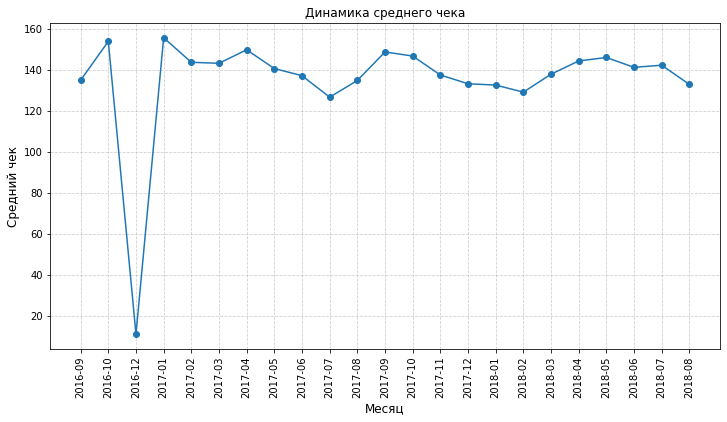

In [63]:
result_table['order_purchase_timestamp'] = result_table['order_purchase_timestamp'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(result_table['order_purchase_timestamp'], result_table['mean_income'], marker='o')

plt.title('Динамика среднего чека', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Средний чек', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Задача 4.

In [64]:
# Гипотеза 1
# Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, 
# вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.
confidence_1 = 8
ease_1 = 6
h_1 = df.query('order_status == "canceled" & order_purchase_timestamp > "2017-06-01 00:00:00"').order_id.count()

if h_1 <= 50:
    impact_1 = 1
elif h_1 <= 150:
    impact_1 = 2
elif h_1 <= 350:
    impact_1 = 3
elif h_1 <= 750:
    impact_1 = 4
elif h_1 <= 1550:
    impact_1 = 5
elif h_1 <= 3150:
    impact_1 = 6
elif h_1 <= 6350:
    impact_1 = 7
elif h_1 <= 12750:
    impact_1 = 8
elif h_1 <= 25550:
    impact_1 = 9
else:
    impact_1 = 10
    

ice_1 = impact_1 * confidence_1 * ease_1
ice_1

192

Задача 4.

In [65]:
# Гипотеза 2
# Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием,
# вследствие чего количество заказов увеличится за счёт повторных заказов.

confidence_2 = 10
ease_2 = 4
h_2 = round(df.query('order_status == "delivered" & order_purchase_timestamp > "2017-06-01 00:00:00" & order_delivered_customer_date > order_estimated_delivery_date').customer_unique_id.nunique() * median_retention)

if h_2 <= 50:
    impact_2 = 1
elif h_2 <= 150:
    impact_2 = 2
elif h_2 <= 350:
    impact_2 = 3
elif h_2 <= 750:
    impact_2 = 4
elif h_2 <= 1550:
    impact_2 = 5
elif h_2 <= 3150:
    impact_2 = 6
elif h_2 <= 6350:
    impact_2 = 7
elif h_2 <= 12750:
    impact_2 = 8
elif h_2 <= 25550:
    impact_2 = 9
else:
    impact_2 = 10

ice_2 = impact_2 * confidence_2 * ease_2
ice_2

40

Задача 4.

In [66]:
# Гипотеза 3
# Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ,
# то клиенты не будут испытывать трудности при оформлении заказа, 
# вследствие чего количество заказов увеличится за счёт повторных заказов.

confidence_3 = 5
ease_3 = 9
h_3 = df.query('order_purchase_timestamp > "2017-06-01 00:00:00"').groupby('customer_unique_id').order_id.nunique().reset_index()
h_3_1 = round((h_3.query('order_id == 1').order_id.sum()) * median_retention)

if h_3_1 <= 50:
    impact_3 = 1
elif h_3_1 <= 150:
    impact_3 = 2
elif h_3_1 <= 350:
    impact_3 = 3
elif h_3_1 <= 750:
    impact_3 = 4
elif h_3_1 <= 1550:
    impact_3 = 5
elif h_3_1 <= 3150:
    impact_3 = 6
elif h_3_1 <= 6350:
    impact_3 = 7
elif h_3_1 <= 12750:
    impact_3 = 8
elif h_3_1 <= 25550:
    impact_3 = 9
else:
    impact_3 = 10

ice_3 = impact_3 * confidence_3 * ease_3
ice_3

135

Вывод: Гипотеза 1 демонстрирует наибольшее значение ICE среди всех рассмотренных вариантов, что свидетельствует о ее потенциально высокой эффективности. Это означает, что реализация данной гипотезы с наибольшей вероятностью принесет значимый положительный эффект.

Задача 5.

1 (целевая метрика) - Метрика количество доставленных заказов

2 (прокси метрика) - Конверсия в доставку

3 (guardrail метрика) - Конверсия в оформление заказа

Формализация проблемы продукта - Основная проблема продукта — отсутствие роста выручки.

Описание выводов из пункта 1 - Retention крайне низкий: после первого месяца возвращается лишь 1% клиентов. Выручка поддерживается только за счет постоянного привлечения новых пользователей, что делает бизнес-модель неустойчивой.

Описание выводов из пункта 2 - Продукт не достигает PMF: отсутствует стабильный рост вовлеченности и повторных покупок среди когорт. Динамика retention указывает на системные проблемы в продукте или сервисе.

Описание выводов из пункта 3 - основные метрики: рост объема продаж; MAU; Конверсия новых пользователей в первую покупку; когортный анализ; денежное выражение вовлеченности клиента.

Описание выводов из пункта 4 - согласно расчетам, гипотеза 1 имеет наивысший показатель ICE, что делает ее приоритетной для тестирования.

Описание выводов из пункта 5 - стоит принять следующие метрики: 
1 Целевая метрика: Количество доставленных заказов (прямой индикатор качества сервиса).
2 Прокси-метрика: Конверсия в доставку (оценка эффективности логистики).
3 Guardrail-метрика: Конверсия в оформление заказа (контроль заказа на ранних этапах).

Общие выводы по итогу исследования - у продукта крайне низкий retention, поэтому не стоит мастштабировать проудкт. Продукт не готов к масштабированию из-за очень низкого retention (до 1% возврата после первого месяца). Текущая выручка зависит исключительно от постоянного притока новых клиентов, что экономически неэффективно. Отсутствие PMF подтверждается данными когортного анализа.

Рекомендации по продукту - Исправить баг в системе процессинга заказов, который, вероятно, вызывает отток клиентов.
